In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from thesis_tools.utils.data import *
from thesis_tools.models.frequentist import *

In [52]:
df = read_panel_data(observations_threshold=50)

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_tools/utils/data.py:249: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_FTSE100['Date'] = pd.to_datetime(df_FTSE100['Date'])


In [53]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
0,Alps,2021,73490.957313,5399.209961,13432.870117,6407.46,3277.080078,2661.699951,13634.599609,1972.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Alps,2022,72714.673699,6999.200195,15471.200195,7464.37,3530.379883,3052.500000,17339.849609,2227.07,...,0.259543,0.141276,0.152678,0.074453,0.136996,0.240397,0.121456,0.195353,-0.035544,1
2,Alps,2023,72714.673699,7082.419922,15128.269531,7771.70,NaN,2820.699951,17662.150391,2223.59,...,0.011820,-0.022415,0.040348,NaN,-0.078976,0.018417,-0.001564,-0.102264,-0.031971,1
3,Asian Islands,2013,4420.354940,3732.600098,7776.049805,6276.88,NaN,1416.800049,6034.750000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Asian Islands,2014,4349.080149,4165.720215,9306.480469,6510.44,1454.050049,1598.500000,6089.500000,NaN,...,0.109784,0.179663,0.036534,NaN,0.120665,0.009032,NaN,0.173863,-0.159823,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,U.S.,2019,65120.394663,4992.720215,11173.099609,6968.85,2521.100098,2029.599976,10830.950195,1472.32,...,-0.093476,-0.165911,-0.077916,0.096148,-0.067579,-0.018003,-0.079627,-0.043318,-0.297712,1
124,U.S.,2020,63528.634303,5806.339844,12981.969727,7286.01,3076.649902,2342.399902,11962.099609,1706.09,...,0.150970,0.150052,0.044506,0.199146,0.143337,0.099335,0.147365,0.176325,0.141198,1
125,U.S.,2021,70219.472454,5399.209961,13432.870117,6407.46,3277.080078,2661.699951,13634.599609,1972.36,...,-0.072698,0.034143,-0.128493,0.063111,0.127789,0.130867,0.145027,0.141080,0.157156,1
126,U.S.,2022,76329.582265,6999.200195,15471.200195,7464.37,3530.379883,3052.500000,17339.849609,2227.07,...,0.259543,0.141276,0.152678,0.074453,0.136996,0.240397,0.121456,0.195353,-0.035544,1


In [54]:
df['weibull_gamma'] = np.nan
df['gpd_gamma'] = np.nan
df['pareto_alpha'] = np.nan
df['weibull_alpha'] = np.nan
df['gpd_alpha'] = np.nan

In [55]:
# iterate over the rows
for i, row in df.iterrows():
    # get the data
    data = np.array(row['net_worth'])
    pareto_alpha, _ = Pareto().fit(data)
    weibull_gamma, weibull_alpha = Weibull().fit(data)
    gpd_gamma, gpd_alpha, _ = GeneralisedPareto().fit(data)
    # store the results
    df.loc[i, 'pareto_alpha'] = pareto_alpha
    df.loc[i, 'weibull_gamma'] = weibull_gamma
    df.loc[i, 'weibull_alpha'] = weibull_alpha
    df.loc[i, 'gpd_gamma'] = gpd_gamma
    df.loc[i, 'gpd_alpha'] = gpd_alpha


In [56]:
import copy
df_group = df[df['group'] == 'Germany']
df_group = copy.deepcopy(df_group)

In [57]:
df_group

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant,weibull_gamma,gpd_gamma,pareto_alpha,weibull_alpha,gpd_alpha
45,Germany,2010,41572.455948,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,NaN,NaN,NaN,NaN,1,0.668862,0.271509,1.112686,2.073891,2.259628
46,Germany,2011,46705.895796,4005.500000,7077.479980,5862.94,NaN,1331.699951,5505.899902,NaN,...,0.120255,NaN,0.180361,-0.068746,1,0.773922,0.218880,1.250786,2.770704,2.933122
47,Germany,2012,43855.854466,3298.550049,6458.910156,5681.61,NaN,1273.699951,5199.250000,NaN,...,-0.057306,NaN,0.020235,-0.196599,1,0.730420,0.253536,1.211359,2.512166,2.674716
48,Germany,2013,46298.922918,3732.600098,7776.049805,6276.88,NaN,1416.800049,6034.750000,NaN,...,0.149020,NaN,0.132339,0.039685,1,0.792694,0.205236,1.313638,3.083520,3.280471
49,Germany,2014,48023.869985,4165.720215,9306.480469,6510.44,1454.050049,1598.500000,6089.500000,NaN,...,0.009032,NaN,0.173863,-0.159823,1,0.708796,0.267524,1.226904,2.525678,2.742192
50,Germany,2015,41103.256436,4604.250000,10694.320313,6749.40,1647.689941,1677.500000,8808.900391,1506.40,...,0.369197,NaN,0.112572,0.456831,1,0.495510,0.422227,1.080429,1.720987,1.941128
51,Germany,2016,42136.120791,4417.020020,9798.110352,6083.79,1784.920044,1562.199951,7563.549805,1472.30,...,-0.152422,-0.022897,-0.027827,-0.159302,1,0.512328,0.390802,1.034562,1.640581,1.833751
52,Germany,2017,44652.589172,4748.899902,11535.309570,7099.15,2217.389893,1805.500000,8561.299805,1493.35,...,0.123911,0.014196,0.160868,0.143226,1,0.477191,0.441538,1.056147,1.640544,1.829015
53,Germany,2018,47939.278288,5481.930176,13189.480469,7533.55,2289.989990,2171.500000,11027.700195,1594.35,...,0.253158,0.065444,0.214407,0.096964,1,0.582433,0.364504,1.182354,2.123379,2.404981
54,Germany,2019,46805.138433,4992.720215,11173.099609,6968.85,2521.100098,2029.599976,10830.950195,1472.32,...,-0.018003,-0.079627,-0.043318,-0.297712,1,0.502842,0.421157,1.106778,1.792892,2.035041


In [8]:
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

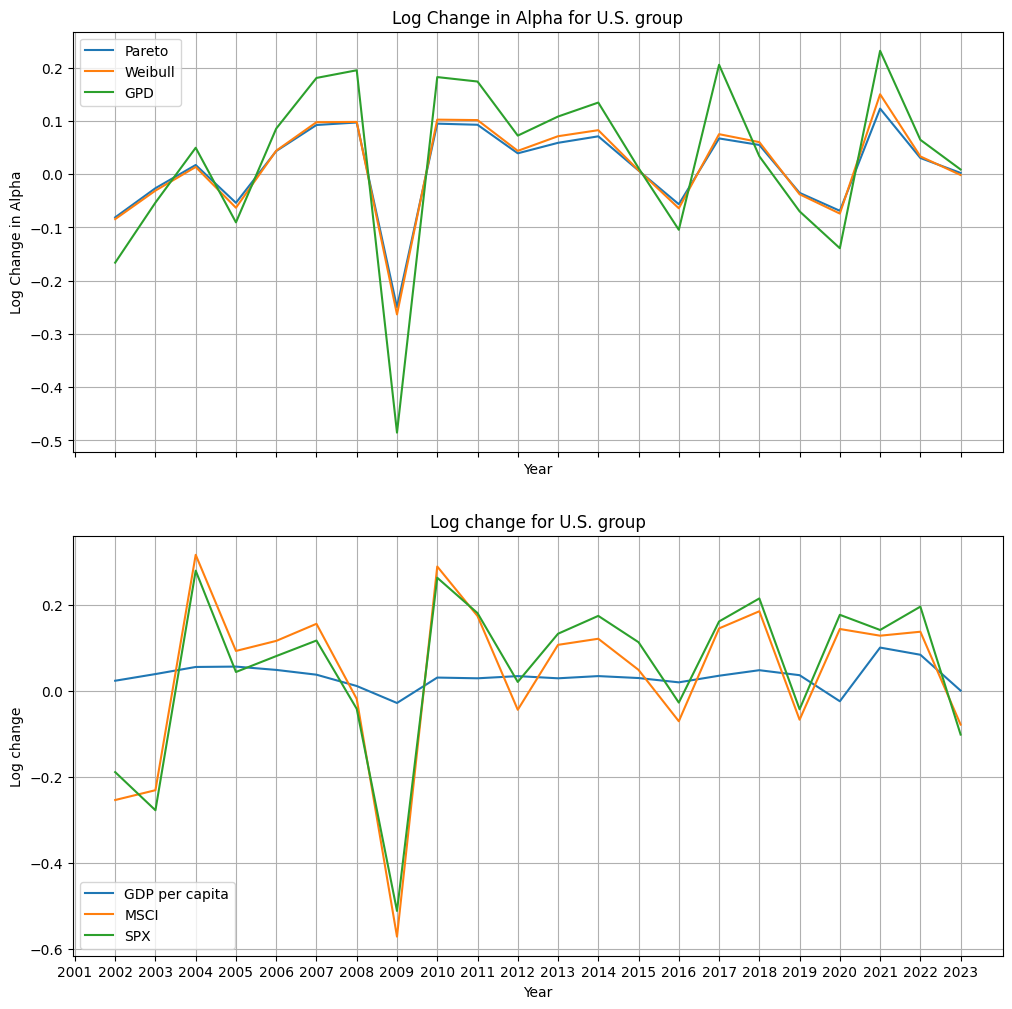

In [9]:
# combine the above two plots into two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
ax[0].plot(df_group['year'], df_group['log_change_alpha_pareto'], label='Pareto')
ax[0].plot(df_group['year'], df_group['log_change_alpha_weibull'], label='Weibull')
ax[0].plot(df_group['year'], df_group['log_change_alpha_gpd'], label='GPD')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Log Change in Alpha')
ax[0].set_title('Log Change in Alpha for U.S. group')
ax[0].grid(True)
ax[0].set_xticks(df_group['year'])
ax[0].legend()

ax[1].plot(df_group['year'], df_group['log_change_gdp_pc'], label='GDP per capita')
ax[1].plot(df_group['year'], df_group['log_change_MSCI'], label='MSCI')
ax[1].plot(df_group['year'], df_group['log_change_SPX'], label='SPX')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Log change')
ax[1].set_title('Log change for U.S. group')
ax[1].grid(True)
ax[1].set_xticks(df_group['year'])
ax[1].legend()
plt.show()

In [10]:
import statsmodels.api as sm
import pandas as pd

# Assuming df_group is your DataFrame

# Define the dependent variable (y) and independent variables (X)
y = df_group['log_change_alpha_gpd']
X = df_group[['log_change_gdp_pc', 'log_change_SPX']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     log_change_alpha_gpd   R-squared:                       0.580
Model:                              OLS   Adj. R-squared:                  0.536
Method:                   Least Squares   F-statistic:                     13.12
Date:                  Tue, 04 Jun 2024   Prob (F-statistic):           0.000263
Time:                          22:20:35   Log-Likelihood:                 18.483
No. Observations:                    22   AIC:                            -30.97
Df Residuals:                        19   BIC:                            -27.69
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [11]:
# count observations per group
df.groupby('group').count()

,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,SPX,...,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant,weibull_gamma,gpd_gamma,pareto_alpha,weibull_alpha,gpd_alpha
group,,,,,,,,,,,,,,,,,,,,,
Alps,10,10,10,10,10,9,10,10,9,10,...,9,8,9,9,10,10,10,10,10,10
Asian Islands,13,13,13,13,13,9,13,13,9,13,...,12,8,12,12,13,13,13,13,13,13
Australia,7,7,7,7,7,6,7,7,7,7,...,6,6,6,6,7,7,7,7,7,7
Brazil,13,13,13,13,13,9,13,13,9,13,...,12,8,12,12,13,13,13,13,13,13
British Islands,14,14,14,14,14,9,14,14,9,14,...,13,8,13,13,14,14,14,14,14,14
Canada,10,10,10,10,10,9,10,10,9,10,...,9,8,9,9,10,10,10,10,10,10
China,17,17,17,17,17,9,17,16,9,17,...,15,8,16,16,17,17,17,17,17,17
France,10,10,10,10,10,9,10,10,9,10,...,9,8,9,9,10,10,10,10,10,10
Germany,20,20,20,20,20,9,20,16,9,20,...,15,8,19,19,20,20,20,20,20,20


Alps

In [12]:
df_group = df[df['group'] == 'Alps']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.396
Model:                                 OLS   Adj. R-squared:                  0.195
Method:                      Least Squares   F-statistic:                     1.966
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.220
Time:                             22:20:35   Log-Likelihood:                 8.9907
No. Observations:                        9   AIC:                            -11.98
Df Residuals:                            6   BIC:                            -11.39
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0102      0.043     -0.234      0.822      -0.116       0.096
log_change_gdp_pc     0.8720      0.843      1.034      0.341      -1.191       2.935
log_change_MSCI       0.4422      0.391      1.131      0.301      -0.515       1.399
==============================================================================
Omnibus:                        2.595   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.409
Skew:                          -0.933   Prob(JB):                        0.494
Kurtosis:                       2.473   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Asian Islands

In [13]:
df_group = df[df['group'] == 'Asian Islands']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.456
Model:                                 OLS   Adj. R-squared:                  0.335
Method:                      Least Squares   F-statistic:                     3.773
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):             0.0646
Time:                             22:20:35   Log-Likelihood:                 16.785
No. Observations:                       12   AIC:                            -27.57
Df Residuals:                            9   BIC:                            -26.11
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0336      0.026     -1.286      0.231      -0.093       0.026
log_change_gdp_pc     0.9282      0.576      1.611      0.142      -0.375       2.231
log_change_MSCI       0.4932      0.209      2.359      0.043       0.020       0.966
==============================================================================
Omnibus:                        4.019   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.198
Skew:                           0.137   Prob(JB):                        0.549
Kurtosis:                       1.476   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Australia

In [14]:
df_group = df[df['group'] == 'Australia']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.383
Model:                                 OLS   Adj. R-squared:                 -0.029
Method:                      Least Squares   F-statistic:                    0.9301
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.485
Time:                             22:20:35   Log-Likelihood:                 5.1995
No. Observations:                        6   AIC:                            -4.399
Df Residuals:                            3   BIC:                            -5.024
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0311      0.072      0.431      0.696      -0.198       0.261
log_change_gdp_pc     1.2182      0.893      1.364      0.266      -1.624       4.061
log_change_MSCI      -0.3865      0.620     -0.624      0.577      -2.359       1.586
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.794
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.069
Skew:                          -0.053   Prob(JB):                        0.966
Kurtosis:                       2.485   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Brazil

In [15]:
df_group = df[df['group'] == 'Brazil']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.013
Model:                                 OLS   Adj. R-squared:                 -0.207
Method:                      Least Squares   F-statistic:                   0.05723
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.945
Time:                             22:20:35   Log-Likelihood:                 5.3197
No. Observations:                       12   AIC:                            -4.639
Df Residuals:                            9   BIC:                            -3.185
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0297      0.064     -0.464      0.653      -0.174       0.115
log_change_gdp_pc    -0.1314      0.392     -0.335      0.745      -1.019       0.756
log_change_MSCI      -0.0079      0.544     -0.015      0.989      -1.238       1.223
==============================================================================
Omnibus:                        0.412   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.060
Skew:                          -0.149   Prob(JB):                        0.970
Kurtosis:                       2.822   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

British Islands

In [16]:
df.columns

Index(['group', 'year', 'gdp_pc', 'CAC40', 'DAX', 'FTSE100', 'MOEX', 'MSCI',
       'NIFTY', 'OMX40', 'SPX', 'SSE', 'net_worth', 'N_net_worth',
       'log_change_gdp_pc', 'log_change_CAC40', 'log_change_DAX',
       'log_change_FTSE100', 'log_change_MOEX', 'log_change_MSCI',
       'log_change_NIFTY', 'log_change_OMX40', 'log_change_SPX',
       'log_change_SSE', 'constant', 'weibull_gamma', 'gpd_gamma',
       'pareto_alpha', 'weibull_alpha', 'gpd_alpha'],
      dtype='object')

In [17]:
df_group = df[df['group'] == 'British Islands']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_FTSE100']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.206
Model:                                 OLS   Adj. R-squared:                  0.047
Method:                      Least Squares   F-statistic:                     1.298
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.315
Time:                             22:20:35   Log-Likelihood:                 14.538
No. Observations:                       13   AIC:                            -23.08
Df Residuals:                           10   BIC:                            -21.38
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0103      0.028      0.373      0.717      -0.051       0.072
log_change_gdp_pc      0.6306      0.412      1.530      0.157      -0.287       1.549
log_change_FTSE100     0.1709      0.281      0.609      0.556      -0.455       0.797
==============================================================================
Omnibus:                        0.967   Durbin-Watson:                   3.112
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.739
Skew:                          -0.248   Prob(JB):                        0.691
Kurtosis:                       1.943   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Canada

In [18]:
df_group = df[df['group'] == 'Canada']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.363
Model:                                 OLS   Adj. R-squared:                  0.150
Method:                      Least Squares   F-statistic:                     1.707
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.259
Time:                             22:20:35   Log-Likelihood:                 12.282
No. Observations:                        9   AIC:                            -18.56
Df Residuals:                            6   BIC:                            -17.97
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0069      0.030     -0.230      0.825      -0.080       0.066
log_change_gdp_pc     0.5098      0.300      1.698      0.140      -0.225       1.244
log_change_MSCI       0.0325      0.263      0.123      0.906      -0.611       0.676
==============================================================================
Omnibus:                        2.040   Durbin-Watson:                   2.776
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                0.477
Skew:                           0.561   Prob(JB):                        0.788
Kurtosis:                       3.112   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

China

In [19]:
df_group = df[df['group'] == 'China']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_SSE']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.448
Model:                                 OLS   Adj. R-squared:                  0.363
Method:                      Least Squares   F-statistic:                     5.279
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):             0.0210
Time:                             22:20:35   Log-Likelihood:                 15.283
No. Observations:                       16   AIC:                            -24.57
Df Residuals:                           13   BIC:                            -22.25
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0102      0.044     -0.234      0.818      -0.104       0.084
log_change_gdp_pc     0.1304      0.373      0.349      0.733      -0.676       0.937
log_change_SSE        0.2659      0.090      2.950      0.011       0.071       0.461
==============================================================================
Omnibus:                        4.403   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                1.394
Skew:                          -0.146   Prob(JB):                        0.498
Kurtosis:                       1.584   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

France

In [20]:
df_group = df[df['group'] == 'France']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_CAC40']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.799
Model:                                 OLS   Adj. R-squared:                  0.732
Method:                      Least Squares   F-statistic:                     11.95
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):            0.00809
Time:                             22:20:35   Log-Likelihood:                 16.895
No. Observations:                        9   AIC:                            -27.79
Df Residuals:                            6   BIC:                            -27.20
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0526      0.017      3.053      0.022       0.010       0.095
log_change_gdp_pc     0.9542      0.217      4.391      0.005       0.422       1.486
log_change_CAC40     -0.0520      0.147     -0.354      0.735      -0.412       0.308
==============================================================================
Omnibus:                        6.891   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                2.437
Skew:                          -1.211   Prob(JB):                        0.296
Kurtosis:                       3.794   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Germany

In [21]:
df_group = df[df['group'] == 'Germany']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_DAX']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.746
Model:                                 OLS   Adj. R-squared:                  0.714
Method:                      Least Squares   F-statistic:                     23.50
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):           1.73e-05
Time:                             22:20:35   Log-Likelihood:                 28.944
No. Observations:                       19   AIC:                            -51.89
Df Residuals:                           16   BIC:                            -49.05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0363      0.014     -2.543      0.022      -0.066      -0.006
log_change_gdp_pc     0.7872      0.202      3.897      0.001       0.359       1.215
log_change_DAX        0.2893      0.084      3.451      0.003       0.112       0.467
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.080
Skew:                           0.065   Prob(JB):                        0.961
Kurtosis:                       2.711   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

India

In [22]:
df_group = df[df['group'] == 'India']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_NIFTY']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.565
Model:                                 OLS   Adj. R-squared:                  0.478
Method:                      Least Squares   F-statistic:                     6.494
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):             0.0156
Time:                             22:20:35   Log-Likelihood:                 17.658
No. Observations:                       13   AIC:                            -29.32
Df Residuals:                           10   BIC:                            -27.62
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0660      0.029     -2.305      0.044      -0.130      -0.002
log_change_gdp_pc     1.1717      0.331      3.542      0.005       0.435       1.909
log_change_NIFTY      0.1063      0.146      0.730      0.482      -0.218       0.431
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.932
Skew:                           0.423   Prob(JB):                        0.627
Kurtosis:                       1.998   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Israel + Turkey


In [23]:
df_group = df[df['group'] == 'Israel + Turkey']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.215
Model:                                 OLS   Adj. R-squared:                  0.058
Method:                      Least Squares   F-statistic:                     1.370
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.298
Time:                             22:20:35   Log-Likelihood:                 15.836
No. Observations:                       13   AIC:                            -25.67
Df Residuals:                           10   BIC:                            -23.98
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0144      0.028      0.511      0.620      -0.048       0.077
log_change_gdp_pc     0.3484      0.381      0.915      0.382      -0.500       1.197
log_change_MSCI       0.2889      0.237      1.217      0.252      -0.240       0.818
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.272
Skew:                           0.053   Prob(JB):                        0.873
Kurtosis:                       2.300   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Italy

In [24]:
df_group = df[df['group'] == 'Italy']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.512
Model:                                 OLS   Adj. R-squared:                  0.350
Method:                      Least Squares   F-statistic:                     3.151
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.116
Time:                             22:20:35   Log-Likelihood:                 10.645
No. Observations:                        9   AIC:                            -15.29
Df Residuals:                            6   BIC:                            -14.70
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0294      0.036     -0.818      0.445      -0.117       0.059
log_change_gdp_pc     0.8664      0.390      2.219      0.068      -0.089       1.822
log_change_MSCI       0.2056      0.305      0.675      0.525      -0.540       0.951
==============================================================================
Omnibus:                        0.734   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.634
Skew:                          -0.394   Prob(JB):                        0.728
Kurtosis:                       1.966   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Japan

In [25]:
df_group = df[df['group'] == 'Japan']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by z

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):                nan
Time:                             22:20:35   Log-Likelihood:                 73.130
No. Observations:                        2   AIC:                            -142.3
Df Residuals:                            0   BIC:                            -144.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0731        inf         -0        nan         nan         nan
log_change_gdp_pc    -0.1871        inf         -0        nan         nan         nan
log_change_MSCI       0.2529        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.290
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         7.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

Russia

In [26]:
df_group = df[df['group'] == 'Russia']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MOEX']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.005
Model:                                 OLS   Adj. R-squared:                 -0.393
Method:                      Least Squares   F-statistic:                   0.01336
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.987
Time:                             22:20:35   Log-Likelihood:                 7.4904
No. Observations:                        8   AIC:                            -8.981
Df Residuals:                            5   BIC:                            -8.742
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0111      0.089      0.126      0.905      -0.216       0.239
log_change_gdp_pc    -0.0284      0.215     -0.132      0.900      -0.580       0.523
log_change_MOEX      -0.0793      0.698     -0.114      0.914      -1.873       1.714
==============================================================================
Omnibus:                        1.631   Durbin-Watson:                   2.791
Prob(Omnibus):                  0.443   Jarque-Bera (JB):                0.044
Skew:                          -0.146   Prob(JB):                        0.978
Kurtosis:                       3.220   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Scandinavia

In [27]:
df_group = df[df['group'] == 'Scandinavia']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_OMX40']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.679
Model:                                 OLS   Adj. R-squared:                  0.551
Method:                      Least Squares   F-statistic:                     5.297
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):             0.0582
Time:                             22:20:36   Log-Likelihood:                 10.579
No. Observations:                        8   AIC:                            -15.16
Df Residuals:                            5   BIC:                            -14.92
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0647      0.034     -1.900      0.116      -0.152       0.023
log_change_gdp_pc     1.3697      0.527      2.599      0.048       0.015       2.724
log_change_OMX40      0.1276      0.430      0.297      0.778      -0.977       1.232
==============================================================================
Omnibus:                        1.529   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                0.997
Skew:                          -0.699   Prob(JB):                        0.607
Kurtosis:                       1.982   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

South Korea

In [28]:
df_group = df[df['group'] == 'South Korea']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by z

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):                nan
Time:                             22:20:36   Log-Likelihood:                 72.597
No. Observations:                        2   AIC:                            -141.2
Df Residuals:                            0   BIC:                            -143.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0058        inf         -0        nan         nan         nan
log_change_gdp_pc    -0.2491        inf         -0        nan         nan         nan
log_change_MSCI       0.6684        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         8.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

Southeast Asia

In [29]:
df_group = df[df['group'] == 'Southeast Asia']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_MSCI']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.213
Model:                                 OLS   Adj. R-squared:                 -0.012
Method:                      Least Squares   F-statistic:                    0.9487
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):              0.432
Time:                             22:20:36   Log-Likelihood:                 12.521
No. Observations:                       10   AIC:                            -19.04
Df Residuals:                            7   BIC:                            -18.13
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0297      0.032     -0.919      0.389      -0.106       0.047
log_change_gdp_pc     0.5823      0.465      1.252      0.251      -0.517       1.682
log_change_MSCI       0.0607      0.277      0.219      0.833      -0.594       0.715
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                0.809
Skew:                          -0.003   Prob(JB):                        0.667
Kurtosis:                       1.607   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

U.S.

In [30]:
df_group = df[df['group'] == 'U.S.']
df_group = copy.deepcopy(df_group)
df_group['log_change_alpha_pareto'] = np.log(df_group['pareto_alpha'] / df_group['pareto_alpha'].shift(1))
df_group['log_change_alpha_weibull'] = np.log(df_group['weibull_alpha'] / df_group['weibull_alpha'].shift(1))
df_group['log_change_alpha_gpd'] = np.log(df_group['gpd_alpha'] / df_group['gpd_alpha'].shift(1))

y = df_group['log_change_alpha_pareto']
X = df_group[['log_change_gdp_pc', 'log_change_SPX']]

# remove the nans
X = X.dropna()
y = y[X.index]

# Add a constant to the independent variables matrix (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_change_alpha_pareto   R-squared:                       0.597
Model:                                 OLS   Adj. R-squared:                  0.554
Method:                      Least Squares   F-statistic:                     14.05
Date:                     Tue, 04 Jun 2024   Prob (F-statistic):           0.000180
Time:                             22:20:36   Log-Likelihood:                 33.751
No. Observations:                       22   AIC:                            -61.50
Df Residuals:                           19   BIC:                            -58.23
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0241      0.019     -1.285      0.214      -0.063       0.015
log_change_gdp_pc     0.7707      0.483      1.596      0.127      -0.240       1.781
log_change_SPX        0.2689      0.074      3.656      0.002       0.115       0.423
==============================================================================
Omnibus:                        0.125   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.258
Skew:                           0.152   Prob(JB):                        0.879
Kurtosis:                       2.565   Cond. No.                         40.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""